# K-MEANS CLUSTERING.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
from collections import Counter

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data.shape

(150, 5)

In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [5]:
Counter(data.target) # used to count the data

Counter({0: 50, 1: 50, 2: 50})

In [6]:
X = data.iloc[:,:-1]
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
model = KMeans(n_clusters=3,random_state=3)
model.fit(X)
model.labels_ #gives the output of the trained model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [8]:
accuracy_score(data.target,model.labels_)

0.8933333333333333

In [20]:
confusion_matrix(data.target,model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [9]:
pd.crosstab(data.target,model.labels_) # confusion matrix

col_0,0,1,2
target,,,
0,50,0,0
1,0,48,2
2,0,14,36


# Visualization

In [10]:
y = pd.DataFrame(data.target)
y.head(2)

,target
0,0
1,0


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'This is the Actual Dataset')

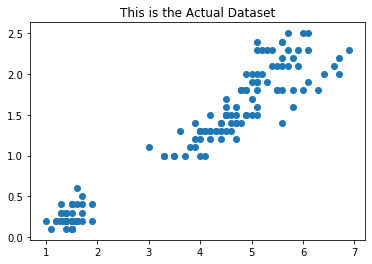

In [21]:
plt.scatter(x=data.petal_length, y=data.petal_width)# take any 2 feature out of 4
plt.title("This is the Actual Dataset")

Text(0.5, 1.0, 'This is the Actual Dataset')

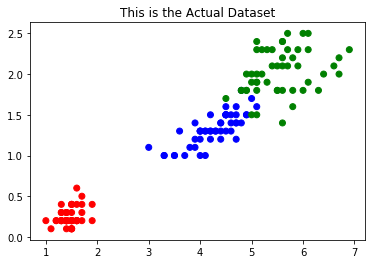

In [13]:
color=np.array(['red','blue','green'])
plt.scatter(x=data.petal_length, y=data.petal_width, c=color[data.target])
plt.title("This is the Actual Dataset")

Text(0.5, 1.0, 'Prediction')

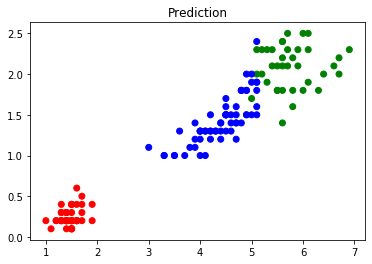

In [14]:
plt.scatter(x=data.petal_length, y=data.petal_width, c=color[model.labels_])
plt.title("Prediction")

# Elbow Technique
- to find the no. of clusters hidden in the data i.e  to find KMeans
- k = 1 to 17, we calculate distortion(Avg distance of points to centroid) and then we plot graph K and the distortion
- if the distortion is less the its closer to the centroid.

In [15]:
from scipy.spatial.distance import cdist

In [16]:
x = data.iloc[:,[2,3]]

In [17]:
X.shape[0]

150

In [18]:
#K means to determine
distortions = []
K = range(1,17)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1)) / X.shape[0])

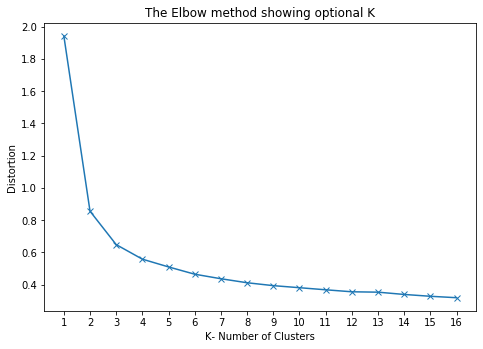

In [19]:
# plot the elbow
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))
ax.set_xlabel('K- Number of Clusters')
ax.set_ylabel('Distortion')
ax.set_title("The Elbow method showing optional K")
ax.plot(K,distortions,marker='x')
plt.show()